In [3]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

In [4]:
# 攻取目标目录所有
def get_data(path=r'./*.xls', on=None):
    """合并数据"""
    all_data = pd.DataFrame()
    for f in glob.glob(path):
        df = pd.read_excel(f)
#        print(len(df))
        all_data = all_data.append(df, ignore_index=True)
    if on:
        return all_data.drop_duplicates(on)
    else:
        return all_data

In [5]:
workdir = r'E:\Work\06-Work\Data Anlysis\02-店铺数据\店铺核心指标'
os.chdir(workdir)

In [6]:
path = r'./成交核心指标分析201*.xls'

In [7]:
df = get_data(path)
len(df)

517

In [8]:
# 列名
df.columns

Index(['日期', '国家', '平台', '数据日期', '浏览量', '访客数', '搜索曝光量', '加购物车人数', '加收藏夹人数',
       '下单买家数', '下单金额', '浏览-下单转化率', '下单订单数', '支付买家数', '支付订单数', '支付金额', '风控订单数',
       '风控金额', '退款金额'],
      dtype='object')

In [9]:
# 行名
df.index

RangeIndex(start=0, stop=517, step=1)

In [10]:
# 前5行
df.head()

,日期,国家,平台,数据日期,浏览量,访客数,搜索曝光量,加购物车人数,加收藏夹人数,下单买家数,下单金额,浏览-下单转化率,下单订单数,支付买家数,支付订单数,支付金额,风控订单数,风控金额,退款金额
0,2016-01-01,TOTAL,TOTAL,最近1天,9621,5493,245555,354,215,81,2099.94,0.0147,93,55,56,1133.91,0,0.00,50.36
1,2016-01-02,TOTAL,TOTAL,最近1天,10169,5821,285614,399,240,71,1171.08,0.0122,79,56,59,833.48,1,3.65,10.00
2,2016-01-03,TOTAL,TOTAL,最近1天,11101,6419,318994,474,270,81,1495.76,0.0126,86,56,56,889.62,0,0.00,342.63
3,2016-01-04,TOTAL,TOTAL,最近1天,10033,5847,297572,382,284,89,1770.10,0.0152,95,76,78,1399.89,0,0.00,207.49
4,2016-01-05,TOTAL,TOTAL,最近1天,10202,5858,297956,472,249,94,2219.09,0.0160,106,75,76,1571.99,0,0.00,38.48


In [11]:
# 浏览-下单转化率图表
df['日期'] = pd.to_datetime(df['日期'])

In [12]:
df = df.set_index('日期')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2016-01-01 to 2017-05-31
Data columns (total 18 columns):
国家          517 non-null object
平台          517 non-null object
数据日期        517 non-null object
浏览量         517 non-null int64
访客数         517 non-null int64
搜索曝光量       517 non-null int64
加购物车人数      517 non-null int64
加收藏夹人数      517 non-null int64
下单买家数       517 non-null int64
下单金额        517 non-null float64
浏览-下单转化率    517 non-null float64
下单订单数       517 non-null int64
支付买家数       517 non-null int64
支付订单数       517 non-null int64
支付金额        517 non-null float64
风控订单数       517 non-null int64
风控金额        517 non-null float64
退款金额        517 non-null float64
dtypes: float64(5), int64(10), object(3)
memory usage: 70.7+ KB


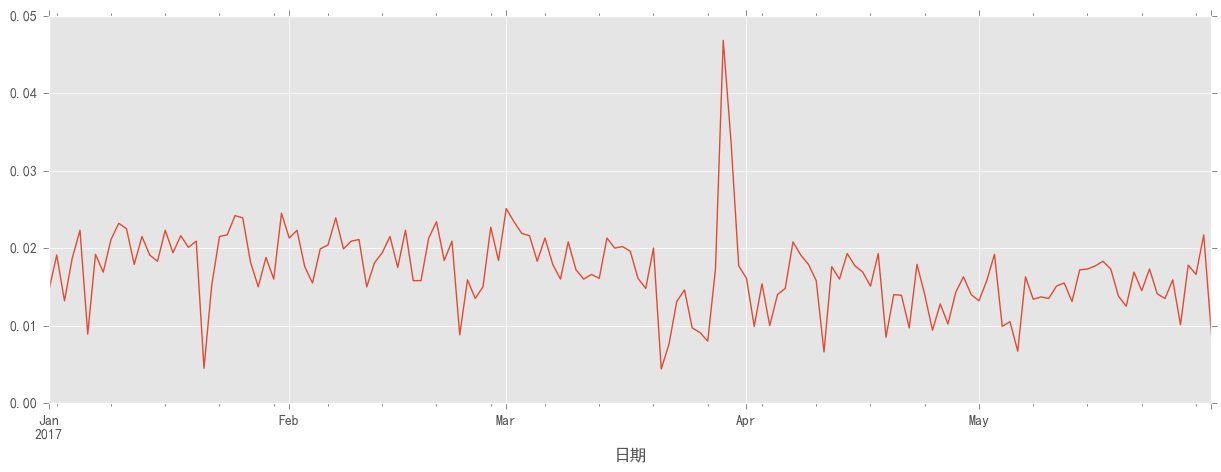

In [14]:
df['浏览-下单转化率']['20170101':].plot(figsize=(15,5))

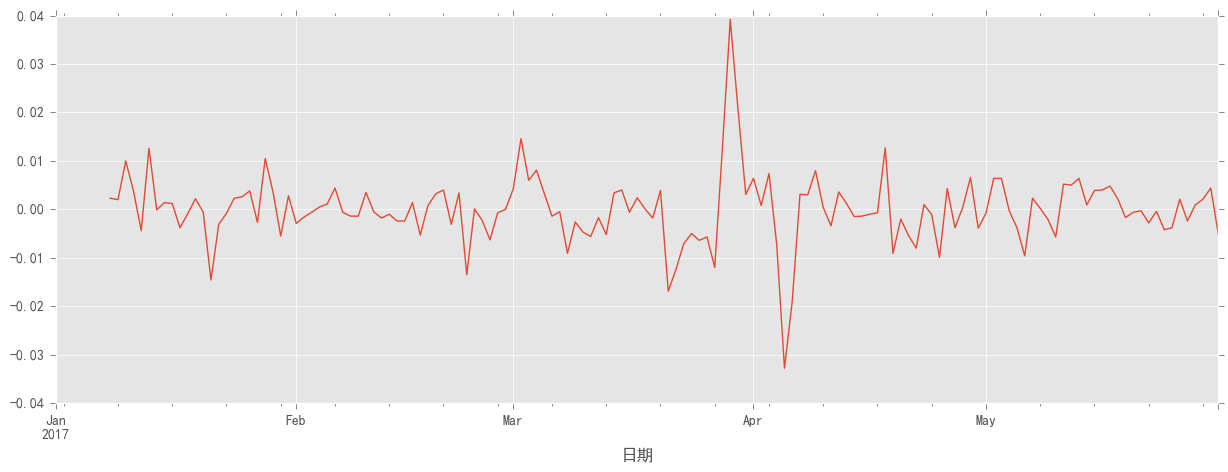

In [15]:
df['浏览-下单转化率']['20170101':].diff(7).plot(figsize=(15,5))

In [16]:
df['浏览-下单转化率']['20170101':].mean()

0.01703046357615894

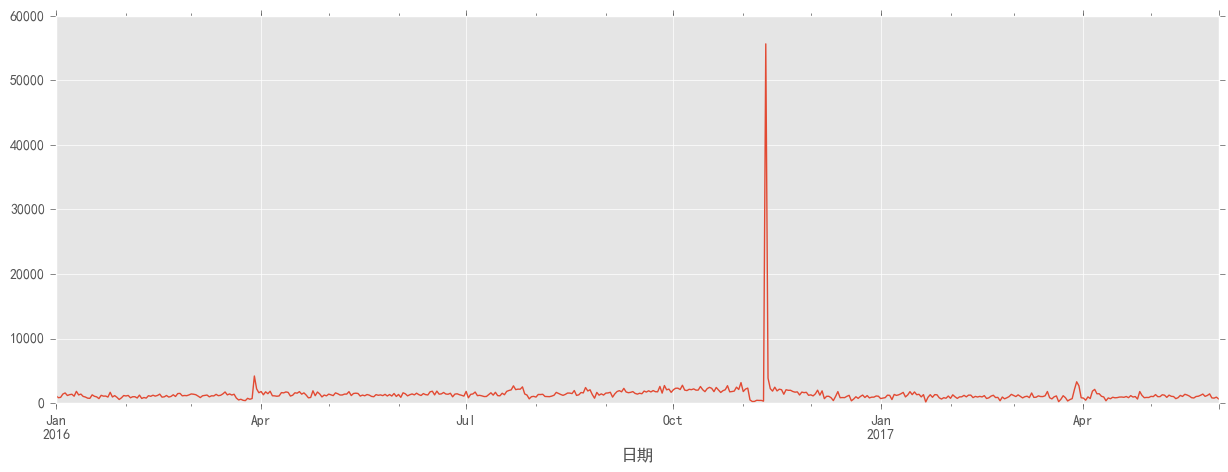

In [17]:
df['支付金额'].plot(figsize=(15,5))

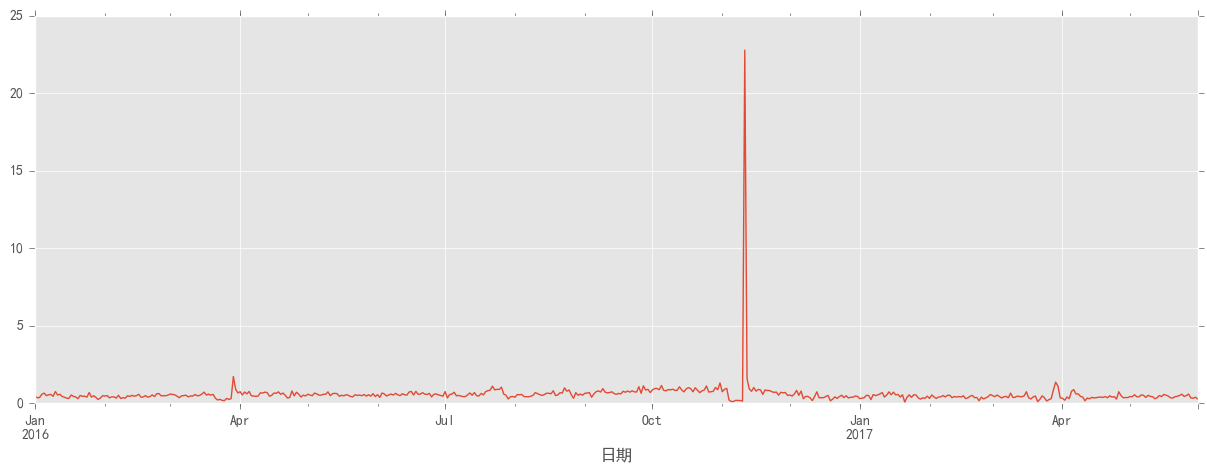

In [18]:
new_df = df['支付金额']/df['支付金额'].std()
new_df.plot(figsize=(15,5))

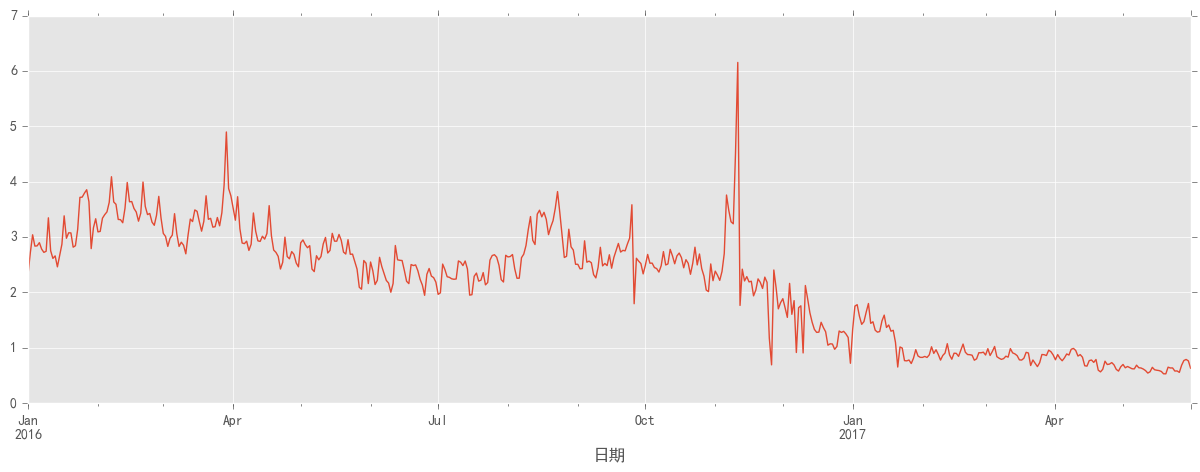

In [19]:
df_explore = df['搜索曝光量']/df['搜索曝光量'].std()
df_explore.plot(figsize=(15,5))

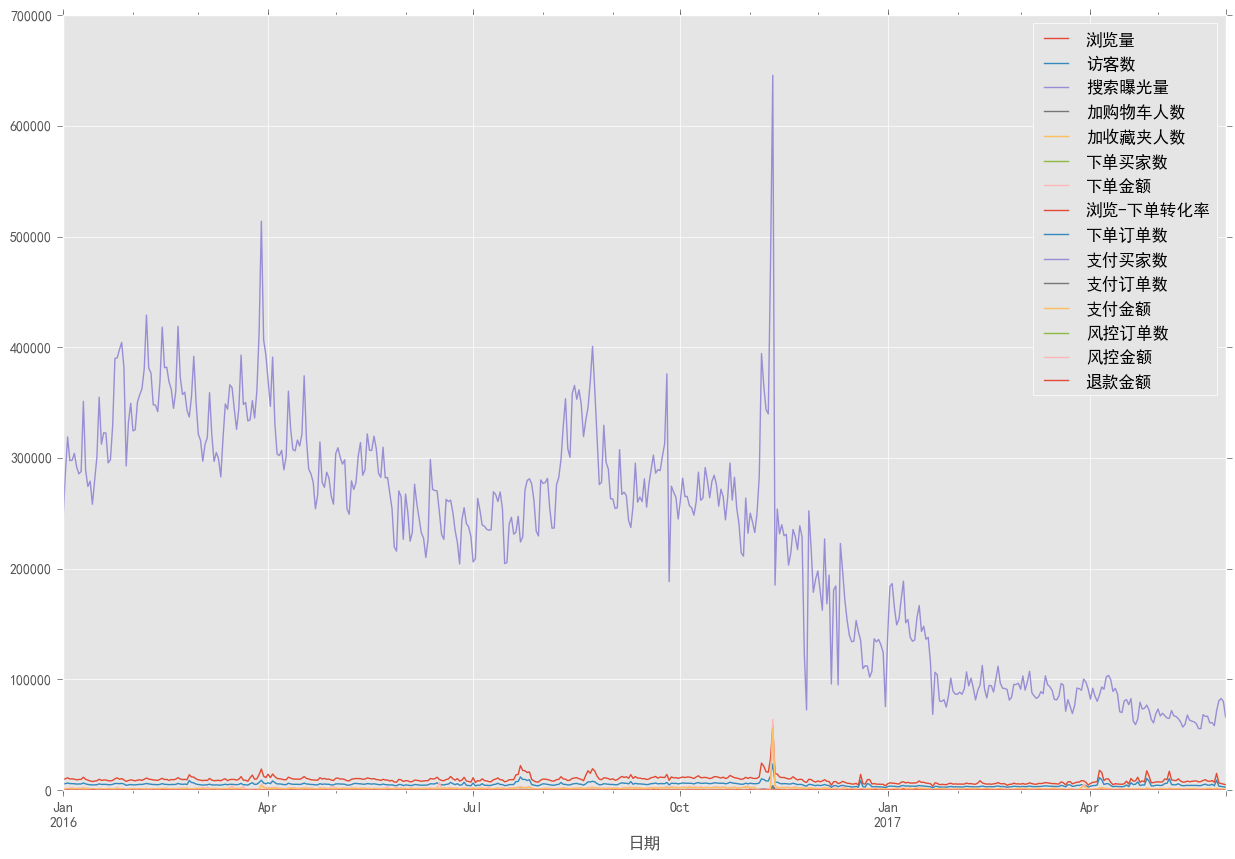

In [17]:
df.plot(figsize=(15,10))

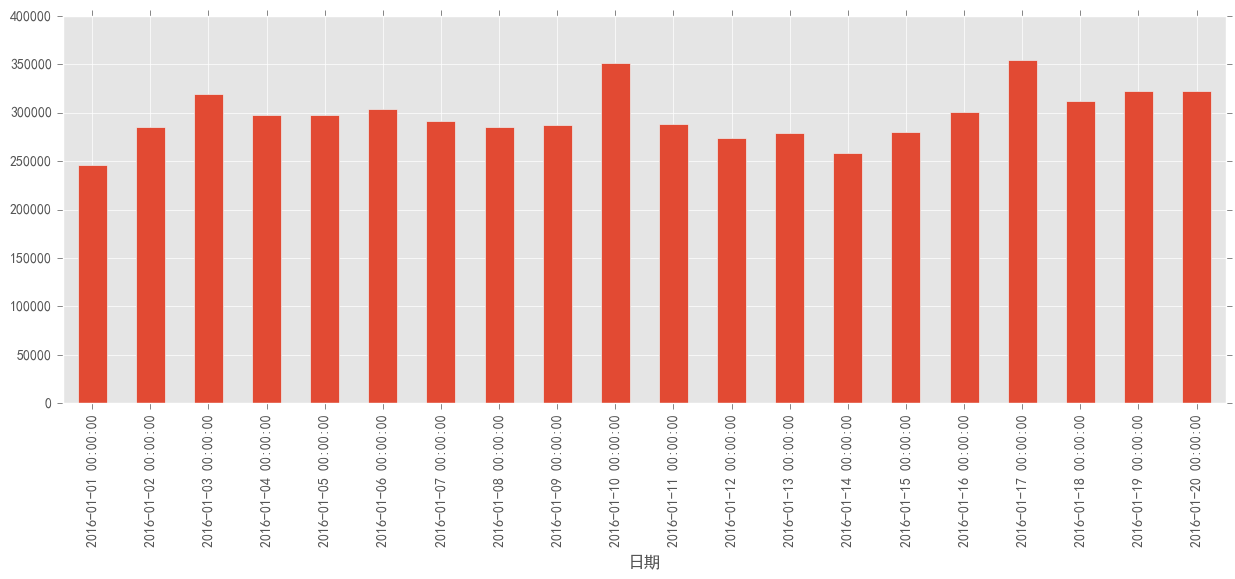

In [20]:
df['搜索曝光量'][:20].plot(kind='bar',figsize=(15,5))

In [21]:
df.to_csv("./simple_sum.csv")

In [22]:
rate = df['浏览-下单转化率']['20170101':]

In [23]:
rate

日期
2017-01-01    0.0146
2017-01-02    0.0191
2017-01-03    0.0132
2017-01-04    0.0187
2017-01-05    0.0223
2017-01-06    0.0089
2017-01-07    0.0192
2017-01-08    0.0169
2017-01-09    0.0211
2017-01-10    0.0232
2017-01-11    0.0225
2017-01-12    0.0179
2017-01-13    0.0215
2017-01-14    0.0191
2017-01-15    0.0183
2017-01-16    0.0223
2017-01-17    0.0194
2017-01-18    0.0216
2017-01-19    0.0201
2017-01-20    0.0209
2017-01-21    0.0045
2017-01-22    0.0152
2017-01-23    0.0215
2017-01-24    0.0217
2017-01-25    0.0242
2017-01-26    0.0239
2017-01-27    0.0182
2017-01-28    0.0150
2017-01-29    0.0188
2017-01-30    0.0160
               ...  
2017-05-02    0.0158
2017-05-03    0.0192
2017-05-04    0.0099
2017-05-05    0.0105
2017-05-06    0.0067
2017-05-07    0.0163
2017-05-08    0.0134
2017-05-09    0.0137
2017-05-10    0.0135
2017-05-11    0.0151
2017-05-12    0.0155
2017-05-13    0.0131
2017-05-14    0.0172
2017-05-15    0.0173
2017-05-16    0.0177
2017-05-17    0.0183
2017-05-18

In [24]:
rate.mean()

0.01703046357615894

In [25]:
rate.max()

0.046799999999999994

In [26]:
rate.min()

0.0044000000000000003

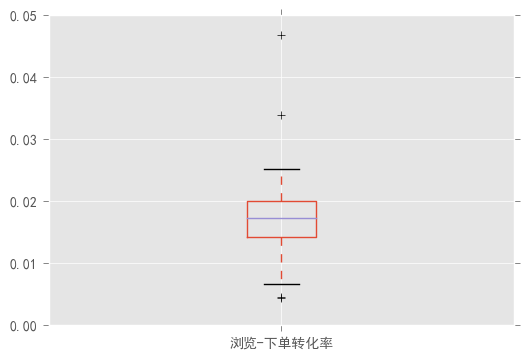

In [27]:
rate.plot(kind='box')

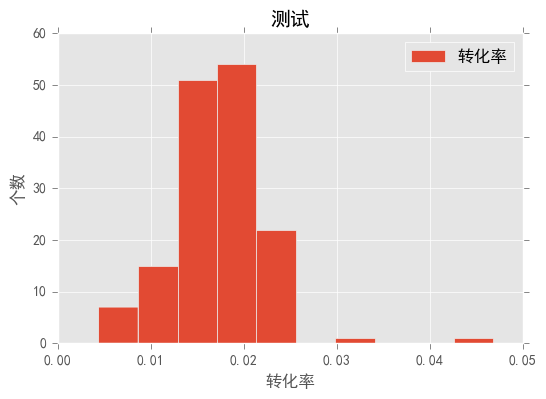

In [28]:
plt.hist(rate,bins=10)
plt.xlabel('转化率')
plt.ylabel('个数')
plt.legend(['转化率']) #图例
plt.title('测试')
plt.show()

In [42]:
data = []
for i in range(0,len(df),7):
    mean_of_seven_days = df['浏览-下单转化率'][i:i+7].mean()
    temp = [round(mean_of_seven_days,4) for i in range(7)]
    data.extend(temp)

In [43]:
data

[0.0141,
 0.0141,
 0.0141,
 0.0141,
 0.0141,
 0.0141,
 0.0141,
 0.0153,
 0.0153,
 0.0153,
 0.0153,
 0.0153,
 0.0153,
 0.0153,
 0.0133,
 0.0133,
 0.0133,
 0.0133,
 0.0133,
 0.0133,
 0.0133,
 0.0108,
 0.0108,
 0.0108,
 0.0108,
 0.0108,
 0.0108,
 0.0108,
 0.0095,
 0.0095,
 0.0095,
 0.0095,
 0.0095,
 0.0095,
 0.0095,
 0.009,
 0.009,
 0.009,
 0.009,
 0.009,
 0.009,
 0.009,
 0.011,
 0.011,
 0.011,
 0.011,
 0.011,
 0.011,
 0.011,
 0.0127,
 0.0127,
 0.0127,
 0.0127,
 0.0127,
 0.0127,
 0.0127,
 0.0114,
 0.0114,
 0.0114,
 0.0114,
 0.0114,
 0.0114,
 0.0114,
 0.0132,
 0.0132,
 0.0132,
 0.0132,
 0.0132,
 0.0132,
 0.0132,
 0.014,
 0.014,
 0.014,
 0.014,
 0.014,
 0.014,
 0.014,
 0.0099,
 0.0099,
 0.0099,
 0.0099,
 0.0099,
 0.0099,
 0.0099,
 0.0127,
 0.0127,
 0.0127,
 0.0127,
 0.0127,
 0.0127,
 0.0127,
 0.0171,
 0.0171,
 0.0171,
 0.0171,
 0.0171,
 0.0171,
 0.0171,
 0.018,
 0.018,
 0.018,
 0.018,
 0.018,
 0.018,
 0.018,
 0.018,
 0.018,
 0.018,
 0.018,
 0.018,
 0.018,
 0.018,
 0.0163,
 0.0163,
 0.0163,


In [44]:
df['wieght_lines'] = pd.Series(data)

In [49]:
df['weight_lines'] = pd.Series(data)
df['weight_lines']

日期
2016-01-01   NaN
2016-01-02   NaN
2016-01-03   NaN
2016-01-04   NaN
2016-01-05   NaN
2016-01-06   NaN
2016-01-07   NaN
2016-01-08   NaN
2016-01-09   NaN
2016-01-10   NaN
2016-01-11   NaN
2016-01-12   NaN
2016-01-13   NaN
2016-01-14   NaN
2016-01-15   NaN
2016-01-16   NaN
2016-01-17   NaN
2016-01-18   NaN
2016-01-19   NaN
2016-01-20   NaN
2016-01-21   NaN
2016-01-22   NaN
2016-01-23   NaN
2016-01-24   NaN
2016-01-25   NaN
2016-01-26   NaN
2016-01-27   NaN
2016-01-28   NaN
2016-01-29   NaN
2016-01-30   NaN
              ..
2017-05-02   NaN
2017-05-03   NaN
2017-05-04   NaN
2017-05-05   NaN
2017-05-06   NaN
2017-05-07   NaN
2017-05-08   NaN
2017-05-09   NaN
2017-05-10   NaN
2017-05-11   NaN
2017-05-12   NaN
2017-05-13   NaN
2017-05-14   NaN
2017-05-15   NaN
2017-05-16   NaN
2017-05-17   NaN
2017-05-18   NaN
2017-05-19   NaN
2017-05-20   NaN
2017-05-21   NaN
2017-05-22   NaN
2017-05-23   NaN
2017-05-24   NaN
2017-05-25   NaN
2017-05-26   NaN
2017-05-27   NaN
2017-05-28   NaN
2017-05-29 